In [1]:
import pandas as pd
from custom_line_plots import *

### Load and transform data

In [2]:
df = pd.read_csv('base_para_prediccion.csv', parse_dates=['fecha'])
print('Number of rows of dataframe before deleting rows: ', df.shape[0])

# Delete rows where "hora" == 25
rows_to_delete = df[df['hora']==25].index.tolist()
df.drop(rows_to_delete, axis=0, inplace=True)

# Change hour "24" to hour "0"
df['hora'] = df['hora'].apply(lambda x: 0 if x==24 else x)

# Delete rows of substations that don't have full data
rows_per_se = df['nemotecnico_se'].value_counts()
se_to_delete = rows_per_se[rows_per_se < rows_per_se.max()].index.tolist()
rows_to_delete = df[df['nemotecnico_se'].isin(se_to_delete)].index.tolist()
df.drop(rows_to_delete, axis=0, inplace=True)
print('Number of rows of dataframe after deleting rows: ', df.shape[0])

# Delete columns that don't have any valid values
columns_to_delete = df.nunique()[df.nunique()==0].index.tolist()
if len(columns_to_delete) > 0:
    df.drop(columns_to_delete, axis=1, inplace=True)
    print('Columns that were deleted: ', columns_to_delete)
else:
    print('No columns were deleted from dataframe...')
    
# Convert "fecha" variable from date to date-time variable adding the "hour" variable
df['fecha'] = df['fecha'] + pd.to_timedelta(df['hora'], unit='H')

Number of rows of dataframe before deleting rows:  112779
Number of rows of dataframe after deleting rows:  95568
Columns that were deleted:  ['gen_eolica_total_mwh', 'gen_geotermica_total_mwh']


In [3]:
df.head()

,nemotecnico_se,fecha,hora,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
120,SE001T002,2019-01-01 01:00:00+00:00,1,NaN,0.0,0.0,54.03,124.604410,-70.57,-56.64,2,61148556,14.2881
121,SE001T002,2019-01-01 02:00:00+00:00,2,NaN,0.0,0.0,54.03,125.415516,-71.39,-56.92,2,136880002,14.2881
122,SE001T002,2019-01-01 03:00:00+00:00,3,NaN,0.0,0.0,54.03,52.383209,1.65,3.15,2,127833826,14.2881
123,SE001T002,2019-01-01 04:00:00+00:00,4,NaN,0.0,0.0,54.03,53.482023,0.55,1.03,2,133924965,14.2881
124,SE001T002,2019-01-01 05:00:00+00:00,5,NaN,0.0,0.0,54.03,52.260469,1.77,3.39,2,138980453,14.2881


### Plotting average cost per hour with confidence intervals (95% confidence level)

In [4]:
se_codes = [
    'SE009T002', 
    'SE005T003',
    'SE123G216'
]

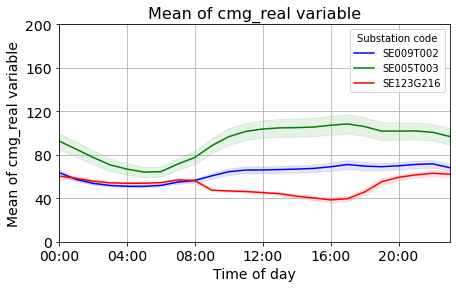

In [5]:
plot_mean_per_hour('cmg_real', se_codes, data=df)

### Plotting n quantiles of cost per hour with confidence intervals (95% confidence level)

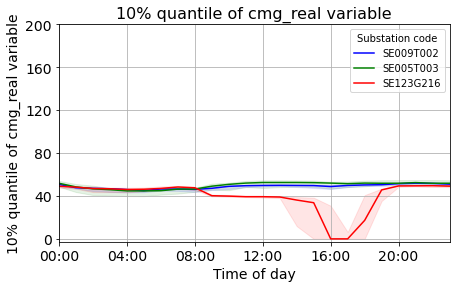

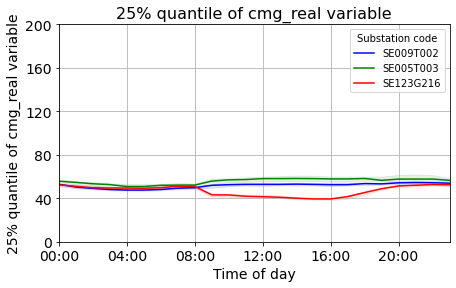

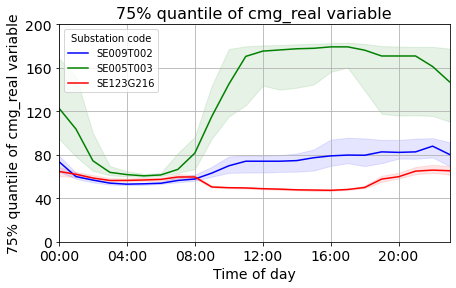

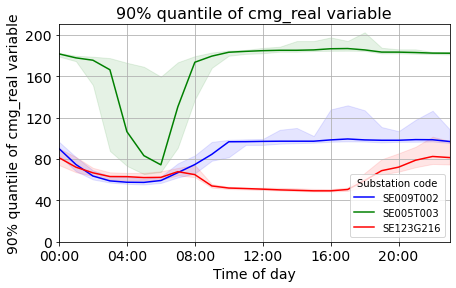

In [6]:
for q in [0.1, 0.25, 0.75, 0.9]:
    plot_quantile_per_hour('cmg_real', se_codes, data=df, q=q)

## Including both plots in the same figure

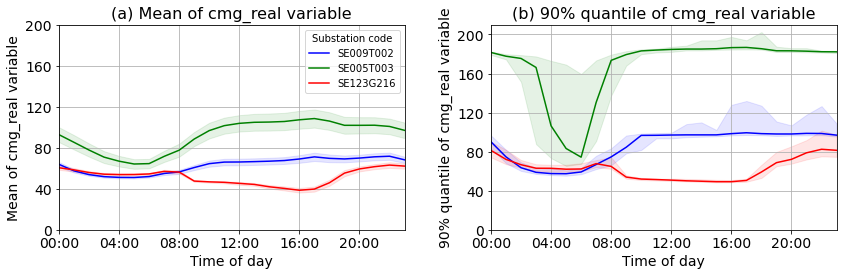

In [7]:
plot_mean_and_quantile_per_hour('cmg_real', se_codes, data=df)

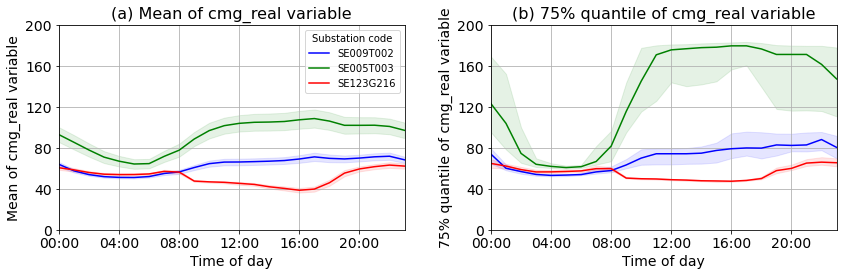

In [8]:
plot_mean_and_quantile_per_hour('cmg_real', se_codes, data=df, q=0.75)

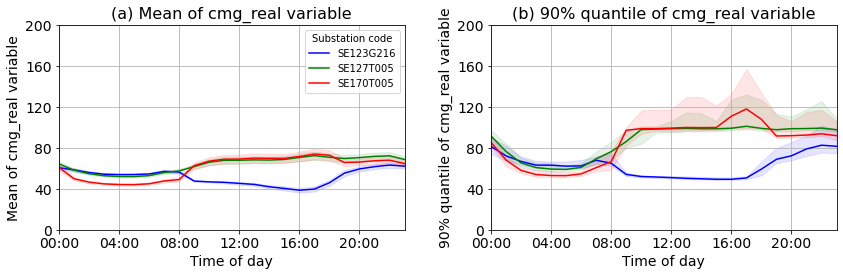

In [9]:
se_codes = [
    'SE123G216', 
    'SE127T005',
    'SE170T005'
]

plot_mean_and_quantile_per_hour('cmg_real', se_codes, data=df)